In [1]:
#Importing all the required libraries. Also, we will further import the remaining required libraries as an when we need them:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

# Step 1: Data Understanding:

__Note:__ Our target variable here is 'SalePrice' column.

In [2]:
#Importing the csv file:
house = pd.read_csv('train.csv')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
house.shape

(1460, 81)

In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Data Cleaning:

#### Checking for null values:

In [6]:
null = pd.DataFrame(round(house.isnull().sum()/len(house.index)*100,2).sort_values(ascending=False),columns=['% Null'])
null.index.name='Features'
null.head(25)

,% Null
Features,
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55


In [7]:
#Let's drop all the features having null values greater then 30%.
#By this filter, we will be dropping the following columns-PoolQC, MiscFeature, Alley, Fence, FireplaceQu and we will drop the Id column as well.

house = house.drop(['Id','PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1)

In [8]:
# Let's check the shape of our dataframe again:
house.shape

(1460, 75)

In [9]:
house.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [10]:
#Let's check the percentage of null again:
null_new = pd.DataFrame(round(house.isnull().sum()/len(house.index)*100,2).sort_values(ascending=False), columns=["% Null"])
null_new.index.name='Features'

null_new.head(15)

,% Null
Features,
LotFrontage,17.74
GarageType,5.55
GarageYrBlt,5.55
GarageFinish,5.55
GarageQual,5.55
GarageCond,5.55
BsmtFinType2,2.60
BsmtExposure,2.60
BsmtQual,2.53


As we can see from above that we have successfully removed all the columns having null values greater that 30% and now we only have columns having null values less than 30%.

In [11]:
house.shape

(1460, 75)

For remaining features, lets impute the values. For numeric features, we will impute with median and for categorical features, we will impute with mode. But, in order to do this, we first need to see which of these above features are categorical and numeric features.

In [12]:
cat_vars = house.select_dtypes(include='object').columns #these are all CATEGORICAL columns.
cat_vars

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [13]:
house.select_dtypes(exclude='object').columns #these are all NUMERIC columns.

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [14]:
house.LotFrontage.dtype

dtype('float64')

In [15]:
house.MasVnrArea.dtype

dtype('float64')

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

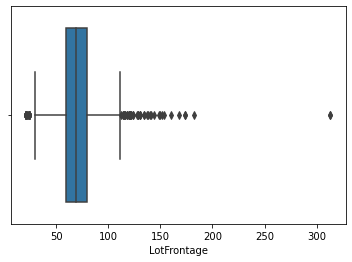

In [16]:
sns.boxplot(house.LotFrontage)
house.LotFrontage.describe()

The LotFrontage has outliers so we will remove them ahead.

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

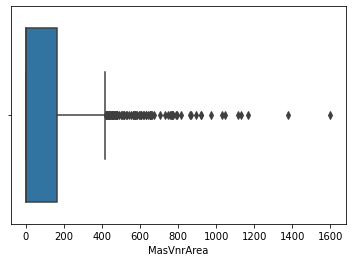

In [17]:
sns.boxplot(house.MasVnrArea)
house.MasVnrArea.describe()

The MasVnrArea also has outliers so we will remove them as well.

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

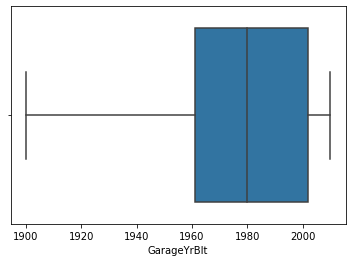

In [18]:
sns.boxplot(house.GarageYrBlt)
house.GarageYrBlt.describe()

In [19]:
#Imputing Numerical columns with their median:
#Our numeric columns are - LotFrontage, GarageYrBlt, MasVnrArea, KitchenAbvGr.
house['LotFrontage'] = house.LotFrontage.fillna(house['LotFrontage'].median())
house['GarageYrBlt'] = house.GarageYrBlt.fillna(house['GarageYrBlt'].median())
house['MasVnrArea'] = house.MasVnrArea.fillna(house['MasVnrArea'].median())

In [20]:
#Let's check the % of null that we have in our features now:

null2 = pd.DataFrame(round(house.isnull().sum()/len(house.index)*100,2).sort_values(ascending=False), columns=['% Null'])
null2.index.name='Features'
null2.head(15)

,% Null
Features,
GarageType,5.55
GarageCond,5.55
GarageFinish,5.55
GarageQual,5.55
BsmtFinType2,2.60
BsmtExposure,2.60
BsmtFinType1,2.53
BsmtCond,2.53
BsmtQual,2.53


In [21]:
#Imputing Categorical columns with median:
#Our categorical columns are- GarageType, GarageCond, GarageFinish, GarageQual, BsmtFinType2, BsmtExposure, 
# BsmtFinType1, BsmtCond, BsmtQual, MasVnrType, Electrical.

for i in (['GarageType','GarageCond','GarageFinish','GarageQual','BsmtFinType2','BsmtExposure',
           'BsmtFinType1','BsmtCond','BsmtQual','MasVnrType','Electrical']):
    house[i] = house[i].fillna(house[i].mode()[0])

In [22]:
#Let's check if we have any null values now:
null3 = pd.DataFrame(round(house.isnull().sum()/len(house.index)*100,2).sort_values(ascending=False), columns=['% Null'])
null3.index.name='Features'
null3.head(15)

,% Null
Features,
MSSubClass,0.0
GarageYrBlt,0.0
Fireplaces,0.0
Functional,0.0
TotRmsAbvGrd,0.0
KitchenQual,0.0
KitchenAbvGr,0.0
BedroomAbvGr,0.0
HalfBath,0.0


As we can see from above that now we do not have any features containing null values.

#### Removing columns having same value >=90% times to avoid class imbalance:

In [23]:
drop_col = []
for col in house.columns:
    if ((house[col].value_counts().max()/len(house))*100) >= 90.0:
        drop_col.append(col)
print(drop_col)

['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [24]:
house = house.drop(drop_col,axis=1)

#### Removing duplicate rows if any:

In [25]:
duplicate = house[house.duplicated()]
duplicate

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice


We can see that we do not have any duplicates row.

#### Replacing Categorical values with their meanings:

Let's map numeric values in 'MSSubClass' to their rerspective meanings. 'MSSubClass' is a numeric column in our dataframe and we don't want it to be treated as a numeric column.

In [26]:
val = {20:'1-STORY 1946 & NEWER ALL STYLES',
        30:'1-STORY 1945 & OLDER',
        40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'
 }
house['MSSubClass']=house['MSSubClass'].map(val)
house['MSSubClass']

0                  2-STORY 1946 & NEWER
1       1-STORY 1946 & NEWER ALL STYLES
2                  2-STORY 1946 & NEWER
3                  2-STORY 1945 & OLDER
4                  2-STORY 1946 & NEWER
                     ...               
1455               2-STORY 1946 & NEWER
1456    1-STORY 1946 & NEWER ALL STYLES
1457               2-STORY 1945 & OLDER
1458    1-STORY 1946 & NEWER ALL STYLES
1459    1-STORY 1946 & NEWER ALL STYLES
Name: MSSubClass, Length: 1460, dtype: object

Similarly, we need to map numeric values in 'OverallQual' and 'OverallCond' to their rerspective meanings. 'OverallQual' and 'OverallCond' are numeric columns in our dataframe and we don't want them to be treated as numeric columns.

In [27]:
values = {10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'}
house['OverallQual']=house['OverallQual'].map(values)
house['OverallQual']

0                Good
1       Above Average
2                Good
3                Good
4           Very Good
            ...      
1455    Above Average
1456    Above Average
1457             Good
1458          Average
1459          Average
Name: OverallQual, Length: 1460, dtype: object

In [28]:
house['OverallCond']=house['OverallCond'].map(values)
house['OverallCond']

0             Average
1           Very Good
2             Average
3             Average
4             Average
            ...      
1455          Average
1456    Above Average
1457        Excellent
1458    Above Average
1459    Above Average
Name: OverallCond, Length: 1460, dtype: object

# Step 2: Visualizing the data:

__Simultaneously checking for outliers and removing them when needed:__

Let's check the boxplots of all the numerical features to check for outliers:

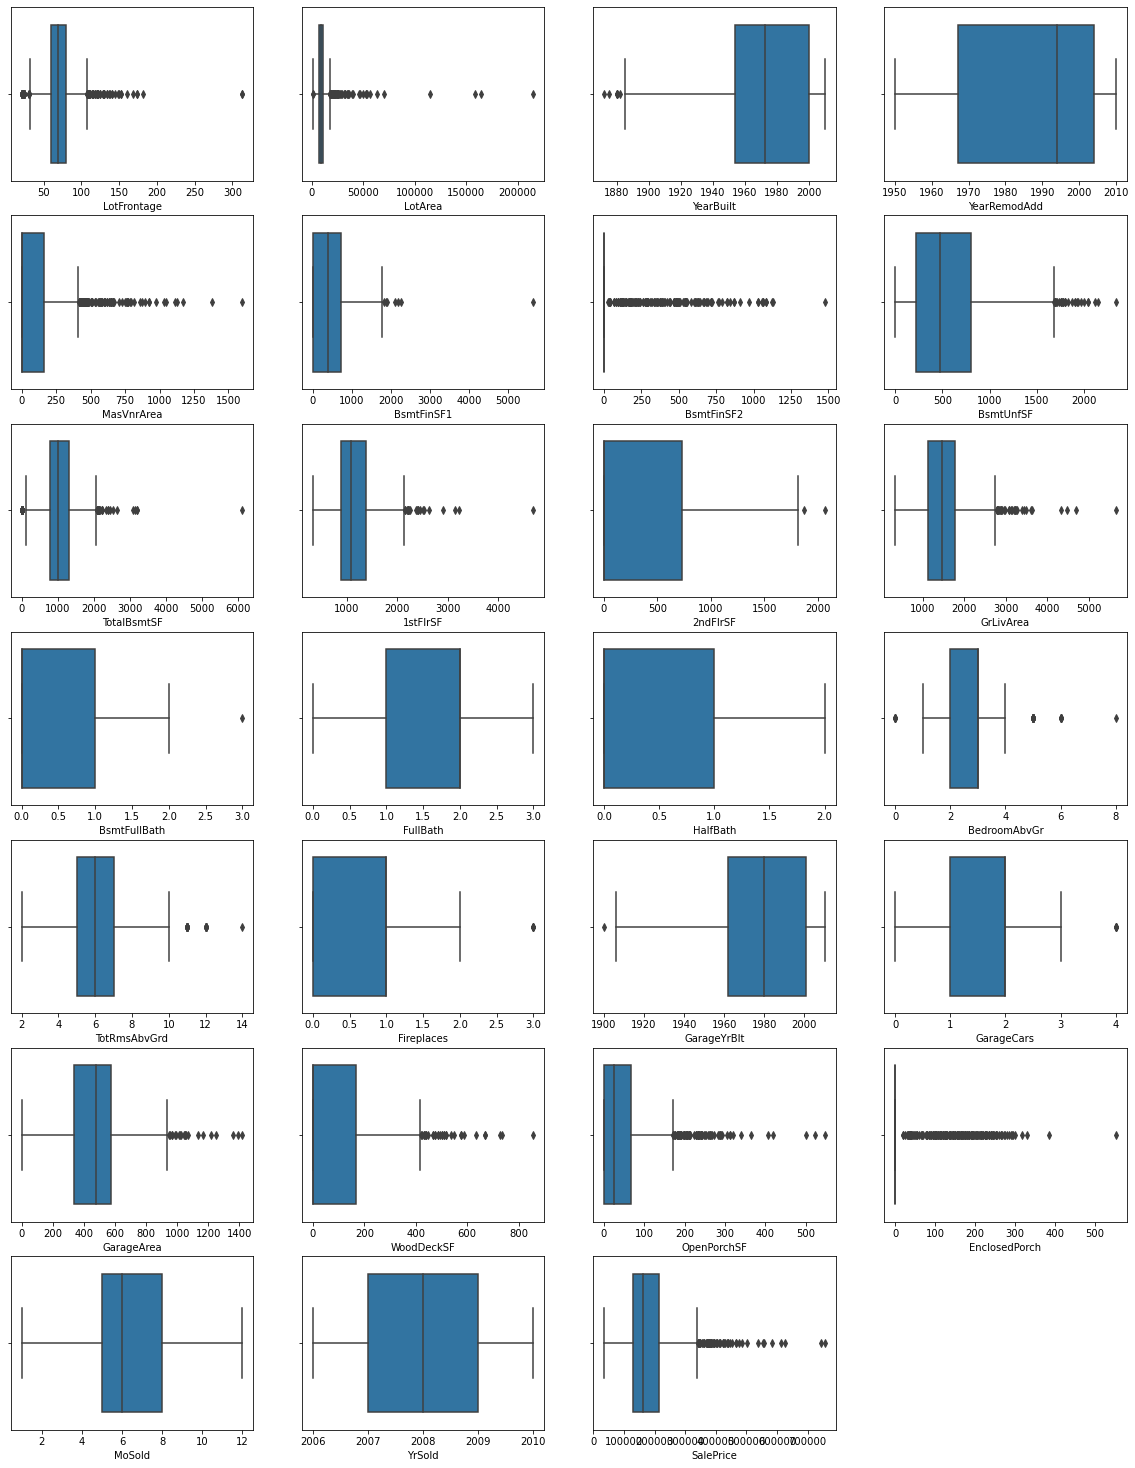

In [29]:
col_ol = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'YrSold', 'SalePrice']
plt.figure(figsize=(20,30))
for i in enumerate(col_ol):
    plt.subplot(8,4,i[0]+1)
    sns.boxplot(x=i[1], data=house)

As we can see there are outliers present in our features.

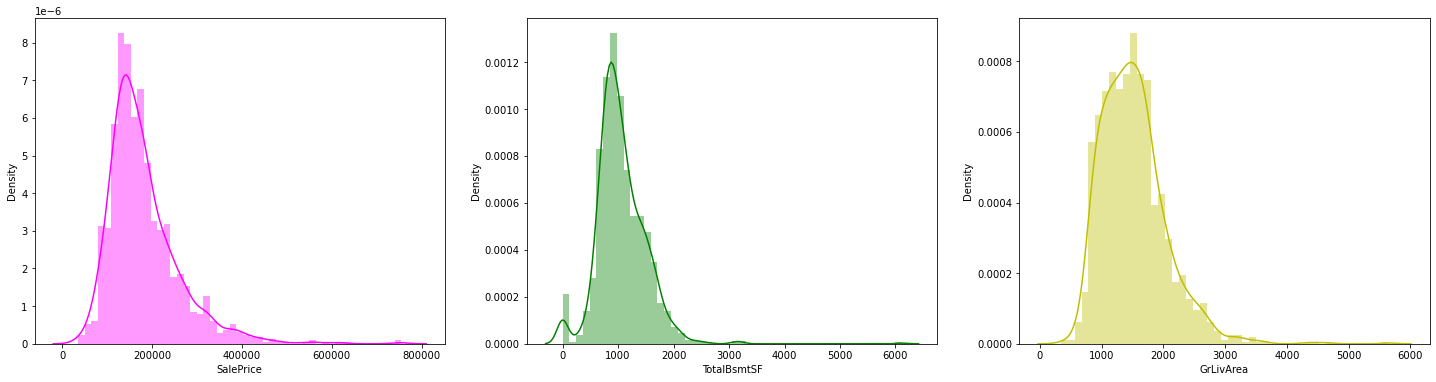

In [30]:
#Visualizing the SalePrice Column:
plt.figure(figsize=[25,6])
plt.subplot(1,3,1)
sns.distplot(house.SalePrice, color='fuchsia')

# Visualizing TotalBsmtSF column:
plt.subplot(1,3,2)
sns.distplot(house.TotalBsmtSF, color='g')

#Visualizing GrLivArea column:
plt.subplot(1,3,3)
sns.distplot(house.GrLivArea, color='y')
plt.show()

In [31]:
#Let's see all the numeric columns in which we have to treat the outliers present in them:
house.select_dtypes(exclude='object').columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [32]:
#Let's remove the outliers from all the numeric columns:

cols = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'YrSold', 'SalePrice']

Q1 = house[cols].quantile(0.05)
Q3 = house[cols].quantile(0.95)
IQR = Q3 - Q1

house = house[~((house[cols] < (Q1 - 1.5 * IQR)) |(house[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

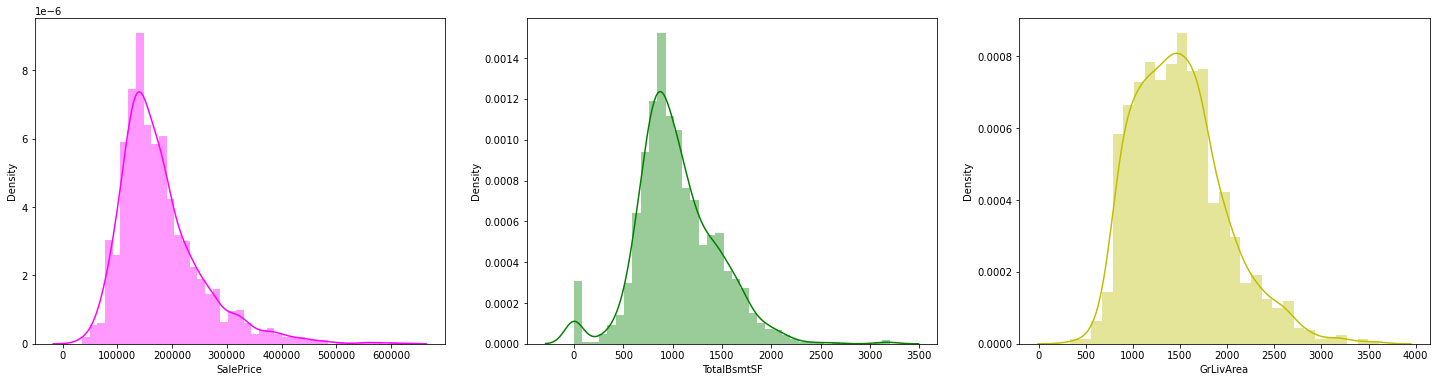

In [33]:
#Visualizing the SalePrice column again:
plt.figure(figsize=[25,6])
plt.subplot(1,3,1)
sns.distplot(house.SalePrice, color='fuchsia')

# Visualizing TotalBsmtSF column again:
plt.subplot(1,3,2)
sns.distplot(house.TotalBsmtSF, color='g')

#Visualizing GrLivArea column again:
plt.subplot(1,3,3)
sns.distplot(house.GrLivArea, color='y')
plt.show()

As we can see from above, by comparing the distribution plots of SalePrice, TotalBsmtSF and GrLivArea columns before removing and after removing the outliers, we can see that the outlier treatments has been done sucessfully.

#### Let's see how the sale price is related with few features:

In [34]:
house.columns.unique()

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition',
       'SalePrice'],
      dtype='object')

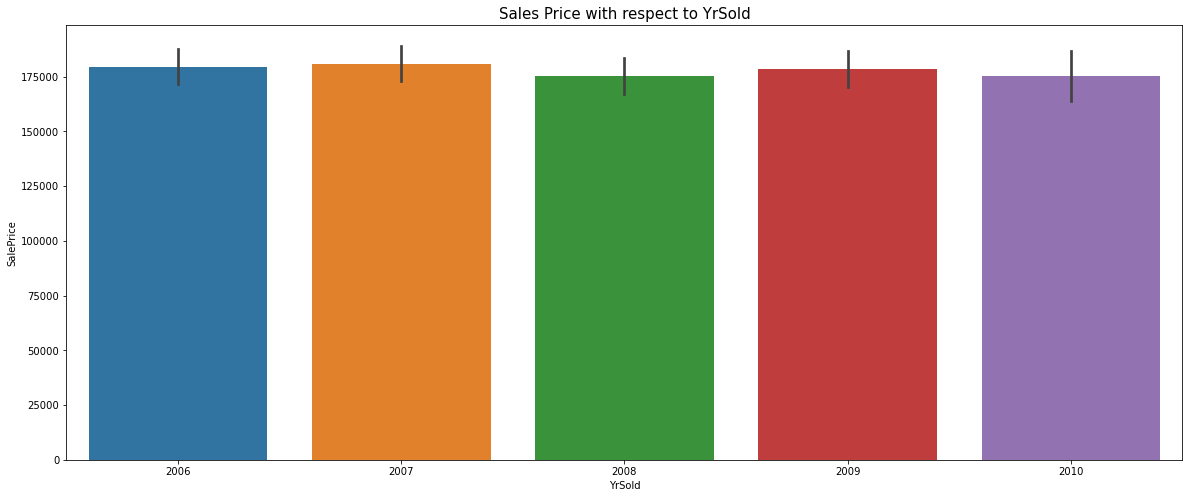

In [35]:
plt.figure(figsize=(20, 8))
sns.barplot(x="YrSold", y="SalePrice", data=house)
plt.title("Sales Price with respect to YrSold", fontsize=15)
plt.show()

### Observations-

We can see that their is a marginal difference in the selling prices of the properties from the year 2006 to 2010.

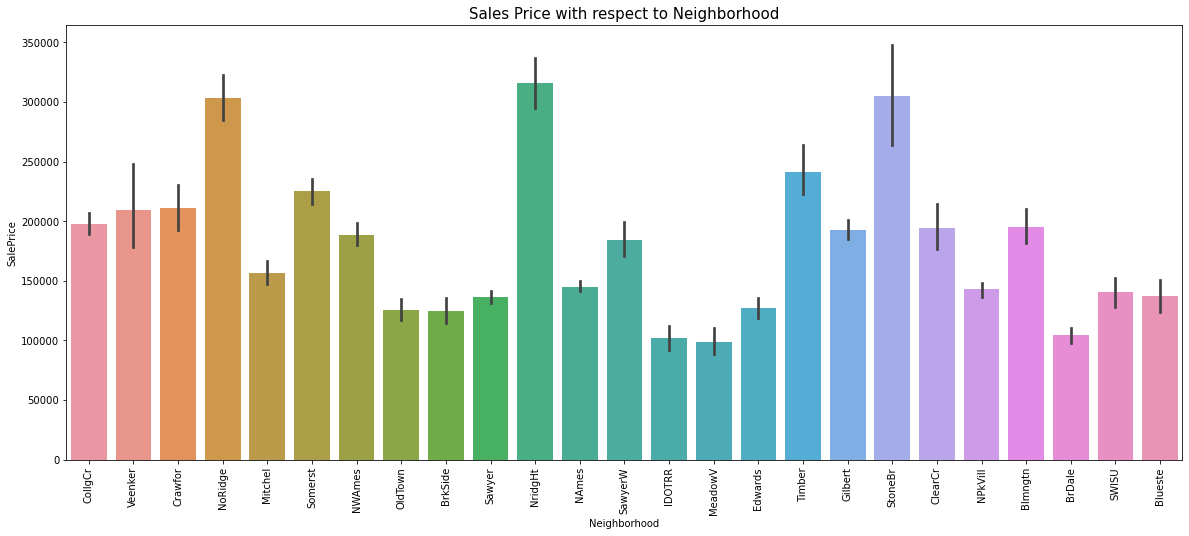

In [36]:
plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data=house)
plt.title("Sales Price with respect to Neighborhood", fontsize=15)
plt.xticks(rotation=90)
plt.show()

### Observations-

From the above barplot we can say that the houses in neighboorhoods like NoRidge, NridgHt, StoneBr, Timber have comparatively higher selling prices.

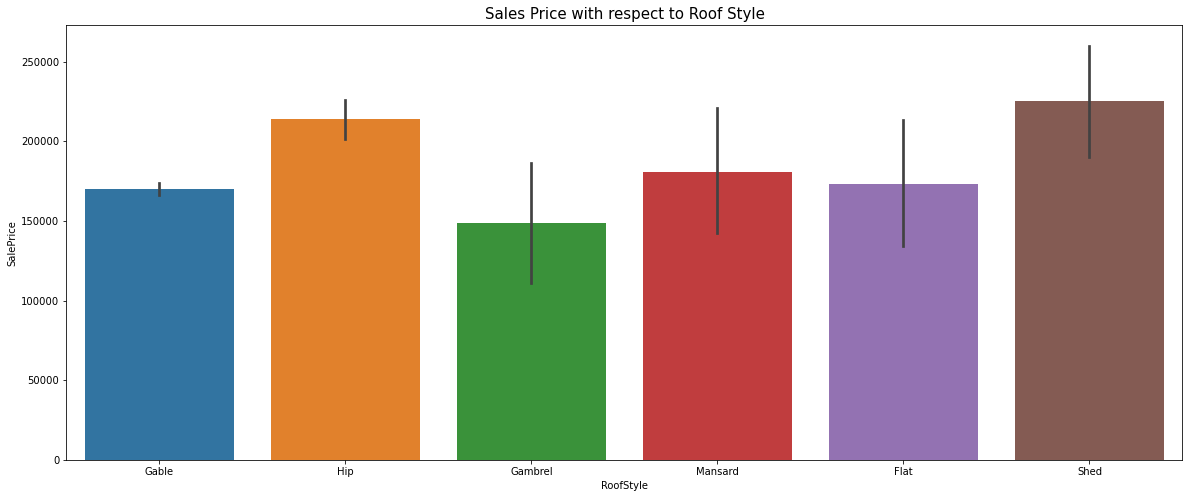

In [37]:
plt.figure(figsize=(20, 8))
sns.barplot(x="RoofStyle", y="SalePrice", data=house)
plt.title("Sales Price with respect to Roof Style", fontsize=15)
plt.show()

### Observations-

The properties having Shed and Hip type of roofs are observed to have high selling prices.

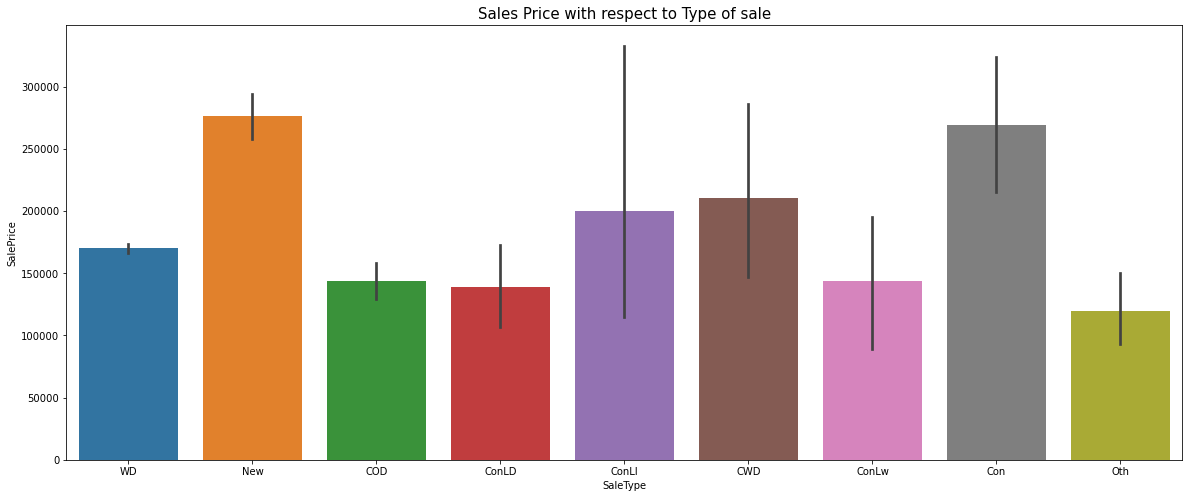

In [38]:
plt.figure(figsize=(20, 8))
sns.barplot(x="SaleType", y="SalePrice", data=house)
plt.title("Sales Price with respect to Type of sale", fontsize=15)
plt.show()

### Observations-

Properties which were just constructed and sold(New) obviously will have higher selling prices which can also be seen from above barplot. Also properties with contract 15% Down payment on regular terms(Con) are also sold at high prices. On the other hand, properties declared as Court Officer Deed/Estate(COD) __and__ properties which falls in other(Oth) categories have low selling prices. 

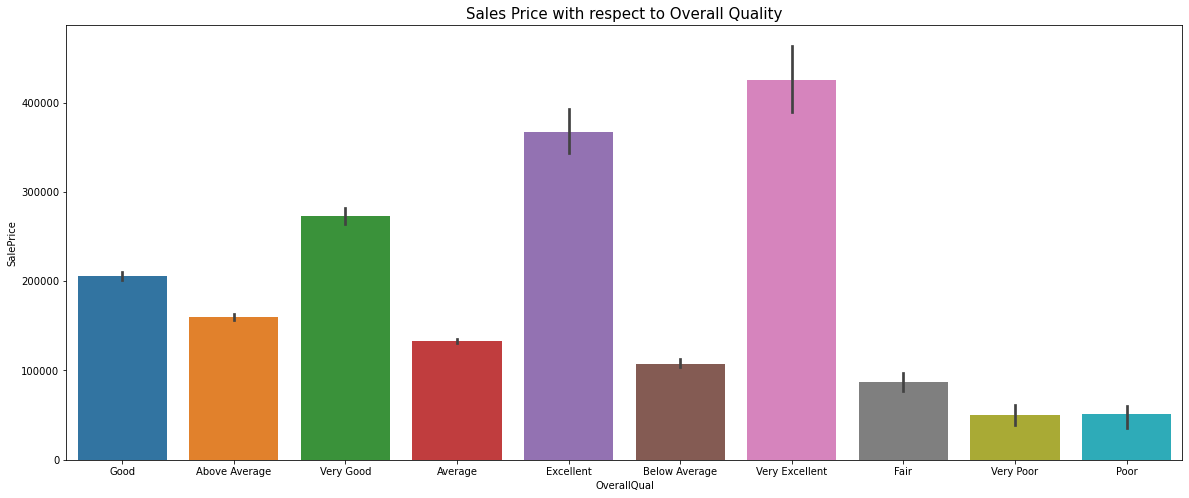

In [39]:
plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data=house)
plt.title("Sales Price with respect to Overall Quality",fontsize=15)
plt.show()

### Observations-

We can say that as the overall quality of properties is directly proportional to the selling price by visualizing the above barplot.

In [40]:
cat_vars = house.select_dtypes(include='object').columns
cat_vars

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual',
       'GarageType', 'GarageFinish', 'SaleType', 'SaleCondition'],
      dtype='object')

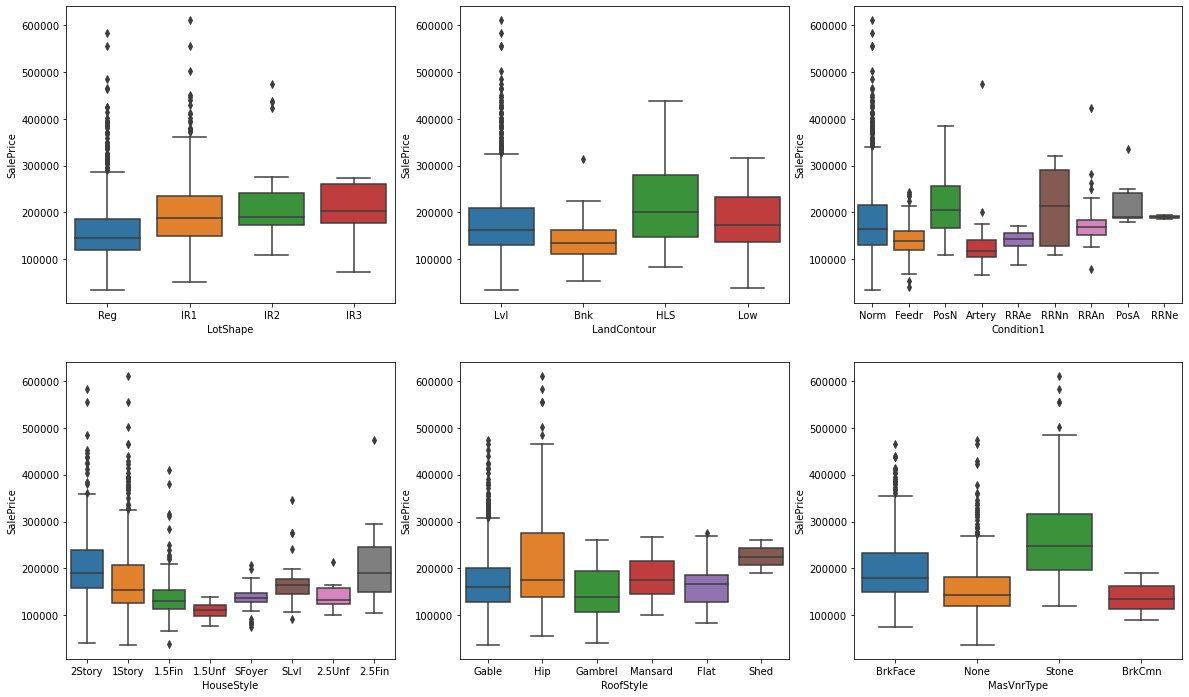

In [41]:
#Visualising Categorical variables in group:

plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x= cat_vars[2],y='SalePrice',data=house)
plt.subplot(2,3,2)
sns.boxplot(x= cat_vars[3],y='SalePrice',data=house)
plt.subplot(2,3,3)
sns.boxplot(x= cat_vars[6],y='SalePrice',data=house)
plt.subplot(2,3,4)
sns.boxplot(x= cat_vars[8],y='SalePrice',data=house)
plt.subplot(2,3,5)
sns.boxplot(x= cat_vars[11],y='SalePrice',data=house)
plt.subplot(2,3,6)
sns.boxplot(x= cat_vars[14],y='SalePrice',data=house)
plt.show()

### Let's have a pairwise look at our dataframe:

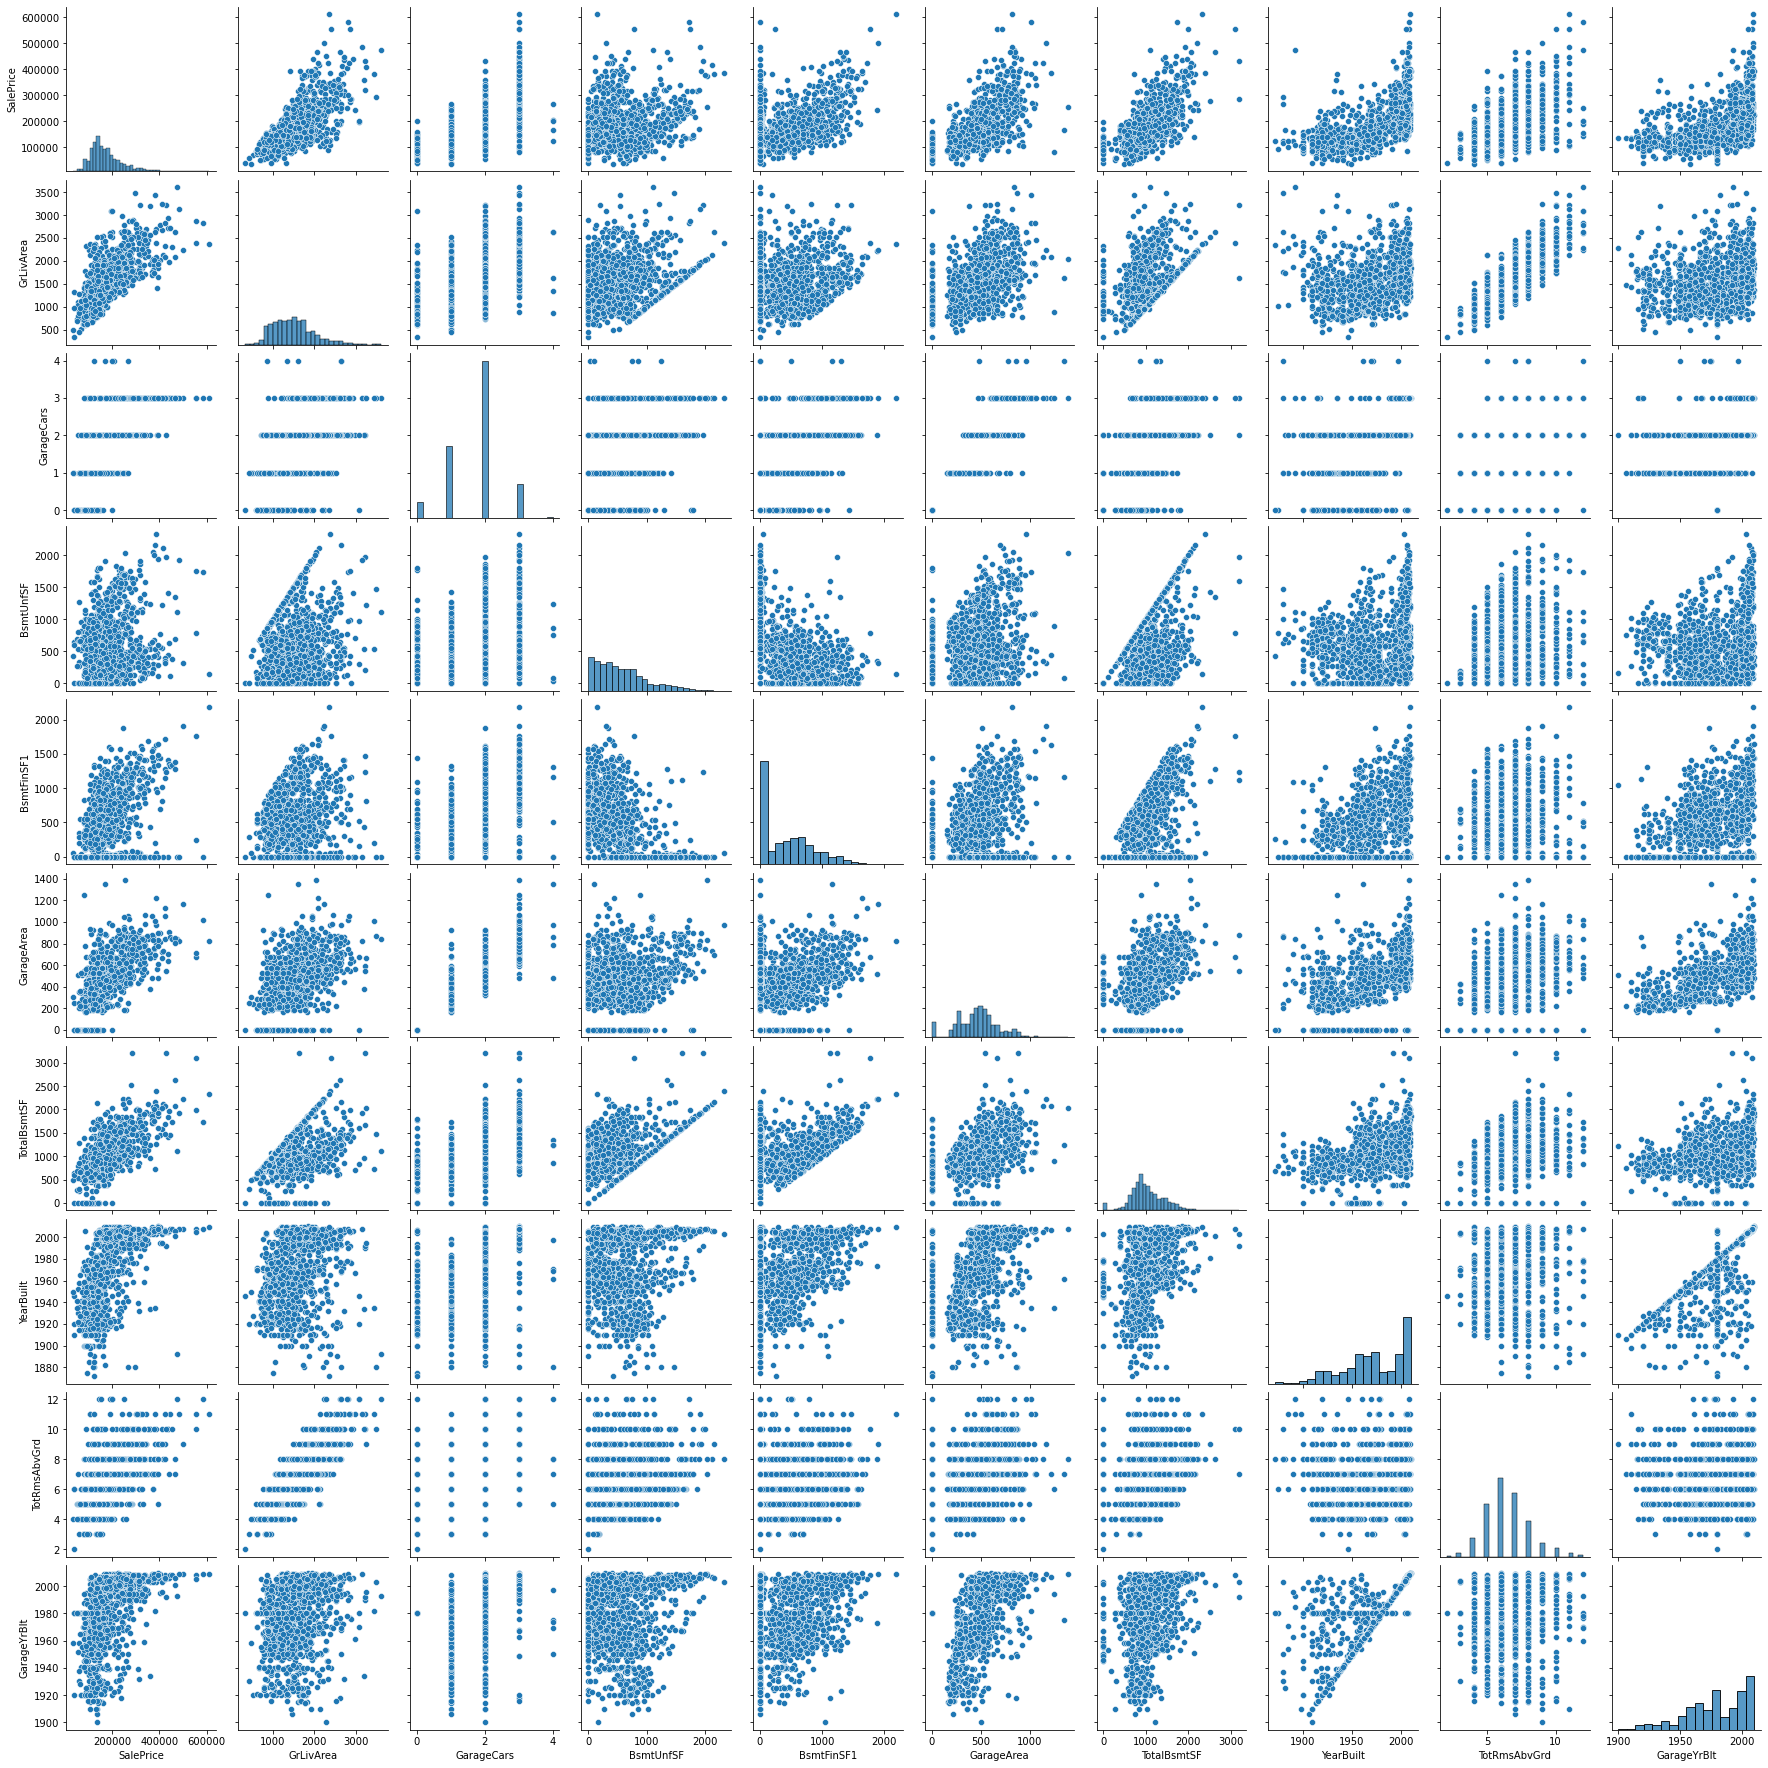

In [42]:
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(house[cols], size = 2.5)
plt.show()

We can see that some features are having fair amount of correlation between them. Good to go ahead.

# Step 3: Preparing the data for modeling:
__(checking for multicollinearity, train-test spli, rescaling, creating dummy vars, etc)__

- Checking multicollinearity.
- Converting cat vars to dummy vars.
- Train-test split.
- Rescaling.

__1. Checking multicollinearity:__

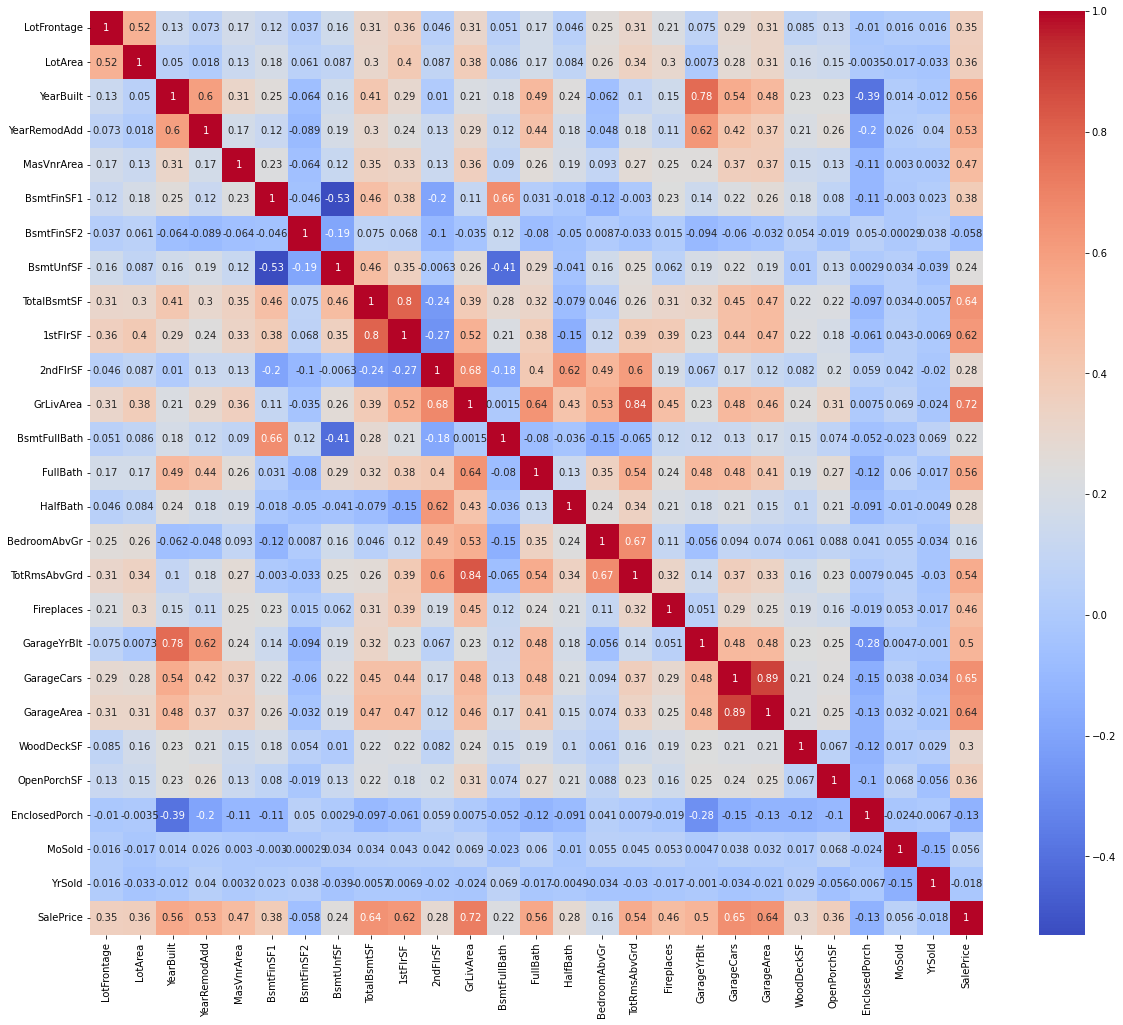

In [43]:
#Let's see the correlations between the variables through heatmap:
plt.figure(figsize=[20,17])
sns.heatmap(house.corr(), annot=True, cmap='coolwarm')
plt.show()

### Observations-

From above heatmap we can see that there are some features having high correlation between them. So we will be removing them.

The highly correlated columns are[considering 75% threshold]- __(1stFlrSF and TotalBsmtSF-0.8)__, __(TotRmsAbvGrd and GrLivArea-0.84)__, __(GarageArea and GarageCars-0.89), __(GarageYrBlt and YearBuilt-0.78).__

In [44]:
house.drop(columns=['1stFlrSF','GrLivArea','GarageCars', 'GarageYrBlt'],inplace=True)

__2. Converting cat vars to dummy vars:__

In [45]:
house = pd.get_dummies(house,drop_first=True)
house.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,2003,2003,196.0,706,0,150,856,854,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,1976,1976,0.0,978,0,284,1262,0,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,2001,2002,162.0,486,0,434,920,866,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,1915,1970,0.0,216,0,540,756,756,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1053,...,0,0,0,0,1,0,0,0,1,0


__3. Doing train-test split:__

In [46]:
import sklearn
from sklearn.model_selection import train_test_split as tts

house_train, house_test = tts(house, train_size=0.7, random_state=40)

In [47]:
print(house_train.shape)
print(house_test.shape)

(997, 203)
(428, 203)


__4. Rescaling the features:__
- There are 2 methods by which we can rescale our predictors:
     - MinMax scaling (aka Normalisation): Compress the data between 0 and 1
     - Standardisation: Converts the data with mean=0 and standard deviation=1.

In [48]:
#We will use Normalisation:

from sklearn.preprocessing import MinMaxScaler as mms

In [49]:
num=['int64', 'float64']
temp_num = house.select_dtypes(include=num).columns
temp_num

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [50]:
# 1. Instiantiate an object:
scaler=mms()

#We want to rescale only numeric vars and not binary vars.
#Creating a list of num vars:
num_vars=['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'YrSold', 'SalePrice']

# 2. Fit and transform on training data:
house_train[num_vars] = scaler.fit_transform(house_train[num_vars])
house_train.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
349,0.217391,0.541187,0.970803,0.933333,0.770593,0.644424,0.0,0.187500,0.576419,0.484048,...,0,0,1,0,0,0,0,0,0,1
990,0.378882,0.227708,0.912409,0.800000,0.374668,0.490859,0.0,0.137842,0.435434,0.541804,...,0,0,0,0,1,0,0,0,1,0
1032,0.298137,0.373012,0.883212,0.716667,0.000000,0.462523,0.0,0.139555,0.417342,0.642464,...,0,0,0,0,1,0,0,0,0,0
654,0.434783,0.255832,0.897810,0.750000,0.584588,0.775137,0.0,0.176798,0.657829,0.000000,...,0,0,0,0,1,0,0,0,1,0
1189,0.242236,0.171973,0.927007,0.816667,0.000000,0.000000,0.0,0.425514,0.310044,0.426843,...,0,0,0,0,1,0,0,0,1,0


In [51]:
#Confirming the maping of num vars between 0 and 1:
house_train[num_vars].describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,...,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice
count,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,...,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000
mean,0.300055,0.237146,0.718952,0.577198,0.090958,0.204651,0.042334,0.241965,0.328806,0.184949,...,0.476429,0.446941,0.200936,0.375486,0.127931,0.124938,0.058910,0.488283,0.463641,0.249729
std,0.123811,0.119341,0.222360,0.346535,0.155260,0.199994,0.142583,0.187839,0.128988,0.235933,...,0.130331,0.160206,0.215091,0.168781,0.167786,0.167684,0.160405,0.241155,0.333074,0.133701
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.242236,0.173686,0.591241,0.266667,0.000000,0.000000,0.000000,0.094606,0.248284,0.000000,...,0.333333,0.300000,0.000000,0.250000,0.000000,0.000000,0.000000,0.363636,0.250000,0.163424
50%,0.298137,0.229078,0.729927,0.716667,0.000000,0.176874,0.000000,0.200342,0.312851,0.000000,...,0.500000,0.400000,0.333333,0.384615,0.000000,0.065934,0.000000,0.454545,0.500000,0.216344
75%,0.366460,0.288582,0.934307,0.900000,0.147919,0.335009,0.000000,0.345890,0.405178,0.396040,...,0.500000,0.500000,0.333333,0.461538,0.228261,0.186813,0.000000,0.636364,0.750000,0.308129
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


All our numeric variables seem to be scaled between 0 and 1. Good to go ahead!

__4.1 Rescaling the features in test set as well:__

In [52]:
house_test[num_vars] = scaler.transform(house_test[num_vars])
house_test.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1058,0.465839,0.280701,0.992701,0.966667,0.136404,0.427788,0.0,0.071918,0.344354,0.579758,...,0,0,0,0,1,0,0,0,1,0
1190,0.298137,0.884733,0.649635,0.416667,0.131975,0.529707,0.0,0.038527,0.389582,0.000000,...,0,0,0,0,1,0,0,0,1,0
1187,0.422360,0.313622,0.890511,0.750000,0.000000,0.665448,0.0,0.071918,0.506550,0.000000,...,0,0,0,0,1,0,0,0,1,0
1402,0.267081,0.150901,0.978102,0.933333,0.000000,0.000000,0.0,0.550514,0.401123,0.000000,...,0,0,1,0,0,0,0,0,0,1
453,0.335404,0.214802,0.992701,0.966667,0.000000,0.000000,0.0,0.328767,0.239551,0.442244,...,0,0,0,0,1,0,0,0,1,0


In [53]:
house_test.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,...,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,0.299356,0.230096,0.739989,0.584268,0.083148,0.180522,0.034001,0.251848,0.317014,0.192713,...,0.002336,0.004673,0.067757,0.004673,0.885514,0.004673,0.016355,0.016355,0.827103,0.070093
std,0.118926,0.115055,0.215214,0.343190,0.136945,0.182865,0.126336,0.192731,0.124906,0.231829,...,0.048337,0.068279,0.251623,0.068279,0.318773,0.068279,0.126986,0.126986,0.378601,0.255603
min,0.000000,-0.005054,0.021898,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.242236,0.168632,0.613139,0.279167,0.000000,0.000000,0.000000,0.111622,0.244464,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.298137,0.217657,0.762774,0.733333,0.000000,0.158135,0.000000,0.216396,0.297567,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.341615,0.281051,0.948905,0.900000,0.137068,0.303588,0.000000,0.347068,0.382408,0.406491,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,0.913043,0.884733,1.007299,1.000000,0.815766,0.716179,0.894033,0.921661,0.998129,0.777778,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
list(house.columns)

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'MoSold',
 'YrSold',
 'SalePrice',
 'MSSubClass_1-1/2 STORY FINISHED ALL AGES',
 'MSSubClass_1-STORY 1945 & OLDER',
 'MSSubClass_1-STORY 1946 & NEWER ALL STYLES',
 'MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
 'MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES',
 'MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES',
 'MSSubClass_2-1/2 STORY ALL AGES',
 'MSSubClass_2-STORY 1945 & OLDER',
 'MSSubClass_2-STORY 1946 & NEWER',
 'MSSubClass_2-STORY PUD - 1946 & NEWER',
 'MSSubClass_DUPLEX - ALL STYLES AND AGES',
 'MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
 'MSSubClass_SPLIT FOYER',
 'MSSubClass_SPLIT OR MULTI-LEVEL',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL'

# Step 4: Training the model:

#### Using RFE to build our model:

In [55]:
#importing RFE and LinearRegression:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

__STP 1: Create X & y:__

In [56]:
#Our X-train is all the columns apart from the target variable(SalePrice) and y-train is the target variable(SalePrice).

y_train = house_train.pop('SalePrice')
X_train = house_train

y_test = house_test.pop('SalePrice')
X_test = house_test

#### Model building and evaluation:

In [57]:
#Making our model to learn the train sets:
lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr, n_features_to_select=25) #Running RFE with 25 vars.
rfe = rfe.fit(X_train, y_train)

In [58]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('LotFrontage', False, 71),
 ('LotArea', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 77),
 ('MasVnrArea', False, 64),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 8),
 ('BsmtUnfSF', False, 7),
 ('TotalBsmtSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('BsmtFullBath', False, 166),
 ('FullBath', False, 31),
 ('HalfBath', False, 62),
 ('BedroomAbvGr', False, 17),
 ('TotRmsAbvGrd', False, 13),
 ('Fireplaces', False, 43),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 133),
 ('OpenPorchSF', False, 50),
 ('EnclosedPorch', False, 66),
 ('MoSold', False, 126),
 ('YrSold', False, 155),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', False, 24),
 ('MSSubClass_1-STORY 1945 & OLDER', False, 25),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', False, 26),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
  False,
  22),
 ('MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES', False, 18),
 ('MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES', False, 14),
 ('MSSubClass_

In [59]:
#Features selected by RFE:
col_selected = X_train.columns[rfe.support_]
print(col_selected)

Index(['LotArea', 'YearBuilt', 'BsmtFinSF1', 'TotalBsmtSF', '2ndFlrSF',
       'GarageArea', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'Neighborhood_Crawfor', 'BldgType_Duplex',
       'OverallQual_Excellent', 'OverallQual_Very Excellent',
       'OverallQual_Very Good', 'OverallCond_Fair', 'Foundation_Slab',
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'SaleType_Con', 'SaleCondition_AdjLand'],
      dtype='object')


In [60]:
#Features rejected by RFE:
col_rejected = X_train.columns[~rfe.support_]
print(col_rejected)

Index(['LotFrontage', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
       ...
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleType_WD', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=177)


In [61]:
X_train_rfe = X_train[col_selected]
X_test_rfe = X_test[col_selected]
lr1 = lr.fit(X_train_rfe,y_train)
print(lr1.intercept_)
print(lr1.coef_)

-0.2736925991491702
[ 0.07033625  0.08903509  0.07403974  0.3770314   0.17970859  0.12845476
  0.08128531  0.07091488  0.07002454  0.06589622  0.07041373 -0.06423947
  0.19338741  0.24895174  0.07211005 -0.06788081  0.10507952 -0.07917672
  0.13756726  0.14434493  0.14823116  0.1143048   0.12455839  0.09180553
  0.10628832]


In [62]:
#Calculating the R-squared, RSS and RMSE values:
from sklearn.metrics import r2_score, mean_squared_error

y_pred_train = lr1.predict(X_train_rfe)
y_pred_test = lr1.predict(X_test_rfe)

def CalculatingValues(y, y_pred):
    r2_lr = r2_score(y, y_pred)
    print('r2 value is:' + " " +str(r2_lr))

    rss_lr = np.sum(np.square(y - y_pred))
    print('rss value is:' + " "+str(rss_lr))

    mse_lr = mean_squared_error(y_train, y_pred_train)
    print('rmse value is:' + " "+str(mse_lr))
    

print('(Lin-Reg)For Training Set:')
CalculatingValues(y_train,y_pred_train)
print()
print('(Lin-Reg)For Test Set:')
CalculatingValues(y_test,y_pred_test)

(Lin-Reg)For Training Set:
r2 value is: 0.8713482643160434
rss value is: 2.2905795630900845
rmse value is: 0.002297471979027166

(Lin-Reg)For Test Set:
r2 value is: 0.8522265770159814
rss value is: 0.9012049494445818
rmse value is: 0.002297471979027166


We have got a good R-squared value of above 80% for both training and testing data which is a good sign to go ahead. But before going ahead lets check if any assumption is violated by performning residual analysis and then evaluating the model-

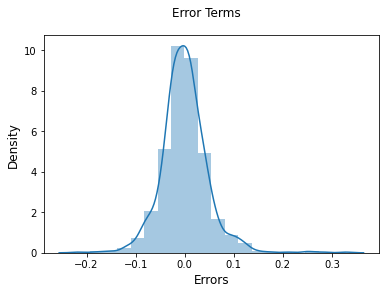

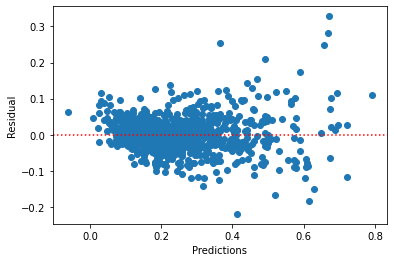

In [63]:
#Residual analysis:

y_res_train = y_train - y_pred_train
#Plot the histogram of the error terms:
fig = plt.figure()
sns.distplot(y_res_train, bins = 20)
fig.suptitle('Error Terms', fontsize = 12)                  
plt.xlabel('Errors', fontsize = 12)
plt.ylabel('Density', fontsize = 12)

fig = plt.figure()
plt.scatter( y_pred_train , y_res_train)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

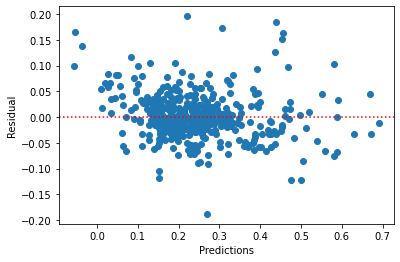

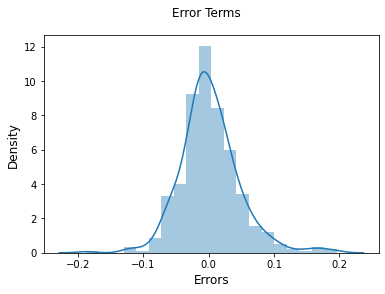

In [64]:
#Evaluating the model:

y_res_test = y_test - y_pred_test

plt.scatter( y_pred_test , y_res_test)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

fig = plt.figure()
sns.distplot(y_res_test, bins = 20)
fig.suptitle('Error Terms', fontsize = 12)                  
plt.xlabel('Errors', fontsize = 12)
plt.ylabel('Density', fontsize = 12)
plt.show()

All assumptions seems to be followed by our model, therefore we can now go ahead.

# Step 5: Performing RIDGE and LASSO regression:

## A]. RIDGE Regression:

In [65]:
#Importing Libraries for ridge and lasso regression:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [66]:
#List of alphas to tune - if value too high it will lead to underfitting, if it is too low, it will not handle the overfitting:
params={'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge=Ridge()

#Defining folds for cross-validation:
folds=5
ridge_model_cv=GridSearchCV(estimator=ridge,
                            param_grid=params,
                            scoring='neg_mean_absolute_error',
                            cv=folds,
                            return_train_score=True,
                            verbose=1)
ridge_model_cv.fit(X_train_rfe,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [67]:
#Getting the best estimator for lambda:
ridge_model_cv.best_estimator_

Ridge(alpha=0.05)

In [68]:
#Check the coefficient values with lambda=0.05:

alpha = 0.05
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[ 0.06971743  0.0894895   0.07437785  0.37421386  0.17929296  0.12819827
  0.07883288  0.06829148  0.06785257  0.06347226  0.07045229 -0.06354613
  0.19362281  0.24855997  0.0724346  -0.06747117  0.10372044 -0.07725452
  0.12207593  0.1279019   0.13260663  0.09782591  0.10895136  0.08735256
  0.10229884]


In [69]:
#Coefficients list:
ridge_parameters = list(ridge.coef_)
#Inserting Y Intercept to model parameters list:
ridge_parameters.insert(0, ridge.intercept_)
#Rounding off the coefficients:
ridge_parameters = [round(i,3) for i in ridge_parameters]

cols = X_train_rfe.columns
cols = cols.insert(0,'constant')
ridge_param_list = list(zip(cols, ridge_parameters))
ridge_param_list

[('constant', -0.255),
 ('LotArea', 0.07),
 ('YearBuilt', 0.089),
 ('BsmtFinSF1', 0.074),
 ('TotalBsmtSF', 0.374),
 ('2ndFlrSF', 0.179),
 ('GarageArea', 0.128),
 ('MSZoning_FV', 0.079),
 ('MSZoning_RH', 0.068),
 ('MSZoning_RL', 0.068),
 ('MSZoning_RM', 0.063),
 ('Neighborhood_Crawfor', 0.07),
 ('BldgType_Duplex', -0.064),
 ('OverallQual_Excellent', 0.194),
 ('OverallQual_Very Excellent', 0.249),
 ('OverallQual_Very Good', 0.072),
 ('OverallCond_Fair', -0.067),
 ('Foundation_Slab', 0.104),
 ('Foundation_Wood', -0.077),
 ('GarageType_Attchd', 0.122),
 ('GarageType_Basment', 0.128),
 ('GarageType_BuiltIn', 0.133),
 ('GarageType_CarPort', 0.098),
 ('GarageType_Detchd', 0.109),
 ('SaleType_Con', 0.087),
 ('SaleCondition_AdjLand', 0.102)]

In [70]:
#Display the mean scores:

ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
3,0.05,-0.033841,-0.035396,1
2,0.01,-0.033817,-0.035415,2
1,0.001,-0.033812,-0.035421,3
0,0.0001,-0.033811,-0.035422,4
4,0.1,-0.033875,-0.035424,5
5,0.2,-0.033937,-0.035466,6
6,0.3,-0.033987,-0.035502,7
7,0.4,-0.034032,-0.035534,8
8,0.5,-0.034073,-0.035566,9
9,0.6,-0.034111,-0.035596,10


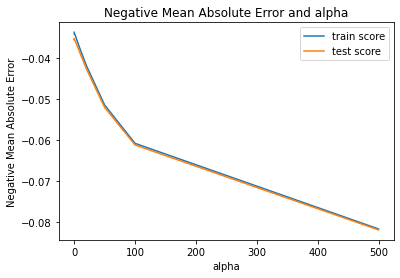

In [71]:
#Plotting mean test and train scoes with alpha:

ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')


plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [72]:
#Lets calculate some metrics such as R2 score, RSS and RMSE:
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

print('(RIDGE)For Training Set:')
CalculatingValues(y_train,y_pred_train)
print()
print('(RIDGE)For Test Set:')
CalculatingValues(y_test,y_pred_test)

(RIDGE)For Training Set:
r2 value is: 0.8713135111736388
rss value is: 2.29119832534247
rmse value is: 0.002298092603151926

(RIDGE)For Test Set:
r2 value is: 0.8537746139373138
rss value is: 0.8917641548331003
rmse value is: 0.002298092603151926


### Residual analysis:

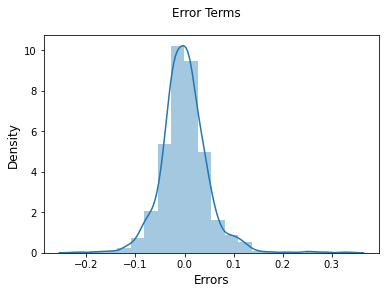

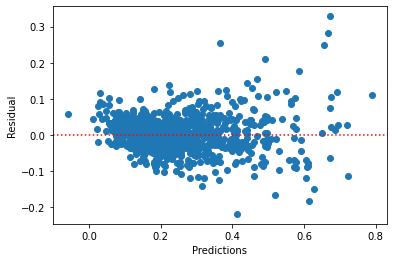

In [73]:
#Residual analysis:
y_res_train = y_train - y_pred_train
#Plot the histogram of the error terms:
fig = plt.figure()
sns.distplot(y_res_train, bins = 20)
fig.suptitle('Error Terms', fontsize = 12)                  
plt.xlabel('Errors', fontsize = 12)
plt.ylabel('Density', fontsize = 12)

fig = plt.figure()
plt.scatter( y_pred_train , y_res_train)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

### Model evaluation:

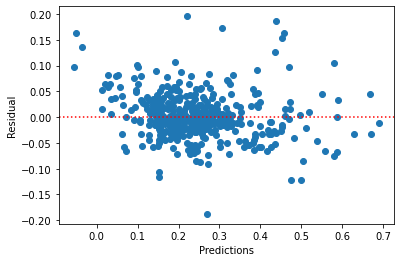

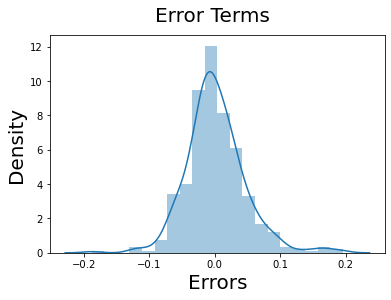

In [74]:
y_res_test = y_test - y_pred_test

plt.scatter( y_pred_test , y_res_test)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

fig = plt.figure()
sns.distplot(y_res_test, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 20)
plt.ylabel('Density', fontsize = 20)
plt.show()

## B]. Lasso regression:

In [75]:
lasso = Lasso()

#List of alphas to tune:

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

#Defining folds for cross-validation:

folds = 5
model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [76]:
#Getting the best estimator for lambda:

model_cv.best_estimator_

Lasso(alpha=0.0001)

In [77]:
#Instantiate Lasso regression with alpha=0.0001:
lasso = Lasso(0.0001)
#Fitting the model with the train set:
lasso.fit(X_train_rfe, y_train)

Lasso(alpha=0.0001)

In [78]:
#Coefficients list:
lasso_parameters = list(lasso.coef_)
#Inserting Y Intercept to model parameters list:
lasso_parameters.insert(0, lasso.intercept_)
#Rounding off the coefficients:
lasso_parameters = [round(i,3) for i in lasso_parameters]

cols = X_train_rfe.columns
cols = cols.insert(0,'constant')
lasso_param_list = list(zip(cols, lasso_parameters))
lasso_param_list

[('constant', -0.084),
 ('LotArea', 0.055),
 ('YearBuilt', 0.092),
 ('BsmtFinSF1', 0.075),
 ('TotalBsmtSF', 0.366),
 ('2ndFlrSF', 0.178),
 ('GarageArea', 0.121),
 ('MSZoning_FV', 0.019),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.012),
 ('MSZoning_RM', 0.005),
 ('Neighborhood_Crawfor', 0.069),
 ('BldgType_Duplex', -0.054),
 ('OverallQual_Excellent', 0.194),
 ('OverallQual_Very Excellent', 0.246),
 ('OverallQual_Very Good', 0.074),
 ('OverallCond_Fair', -0.061),
 ('Foundation_Slab', 0.09),
 ('Foundation_Wood', -0.023),
 ('GarageType_Attchd', 0.014),
 ('GarageType_Basment', 0.005),
 ('GarageType_BuiltIn', 0.023),
 ('GarageType_CarPort', -0.003),
 ('GarageType_Detchd', 0.0),
 ('SaleType_Con', 0.0),
 ('SaleCondition_AdjLand', 0.04)]

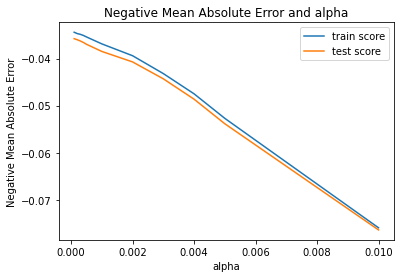

In [79]:
#Plotting mean test and train scoes with alpha:

lasso_cv_results = pd.DataFrame(model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')


plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [80]:
#Lets calculate some metrics such as R2 score, RSS and RMSE:
y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)

print('(LASSO)For Training Set:')
CalculatingValues(y_train,y_pred_train)
print()
print('(LASSO)For Test Set:')
CalculatingValues(y_test,y_pred_test)

(LASSO)For Training Set:
r2 value is: 0.8667258903336928
rss value is: 2.3728786111413402
rmse value is: 0.0023800186671427684

(LASSO)For Test Set:
r2 value is: 0.854459296286021
rss value is: 0.8875885790834676
rmse value is: 0.0023800186671427684


### Residual Analysis:

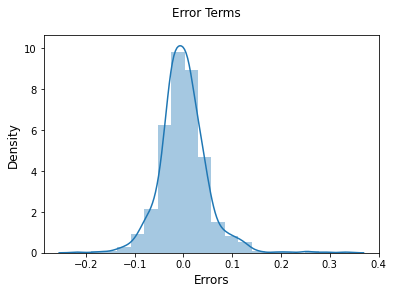

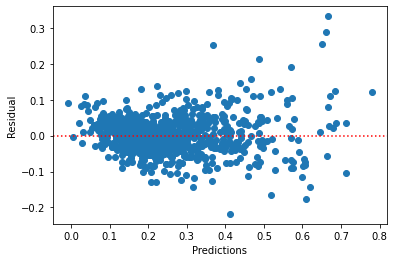

In [81]:
y_res_train = y_train - y_pred_train
#Plot the histogram of the error terms:
fig = plt.figure()
sns.distplot(y_res_train, bins = 20)
fig.suptitle('Error Terms', fontsize = 12)                  
plt.xlabel('Errors', fontsize = 12)
plt.ylabel('Density', fontsize = 12)

fig = plt.figure()
plt.scatter( y_pred_train , y_res_train)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

### Model Evaluation:

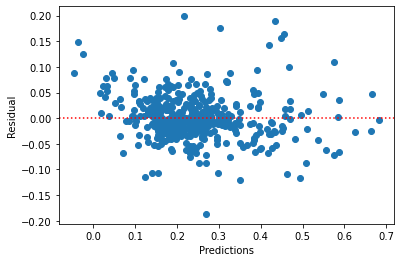

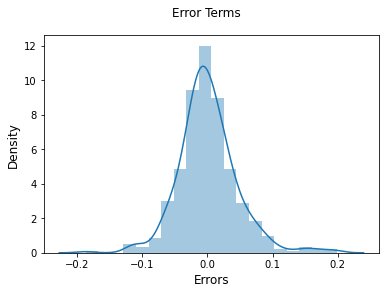

In [82]:
y_res_test = y_test - y_pred_test

plt.scatter( y_pred_test , y_res_test)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

fig = plt.figure()
sns.distplot(y_res_test, bins = 20)
fig.suptitle('Error Terms', fontsize = 12)                  
plt.xlabel('Errors', fontsize = 12)
plt.ylabel('Density', fontsize = 12)
plt.show()

#### Let's Compare all the coefficients that we obtained from the three models:

In [83]:
betas = pd.DataFrame(index=X_train_rfe.columns)
betas.rows = X_train_rfe.columns
betas['Linear'] = lr1.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)

beta0 = pd.DataFrame(index=['constant'])
beta0['Linear'] = lr1.intercept_
beta0['Ridge'] = ridge.intercept_
beta0['Lasso'] = lasso.intercept_
new_df = beta0.append(betas)
new_df

,Linear,Ridge,Lasso
constant,-0.273693,-0.255147,-0.084334
LotArea,0.070336,0.069717,0.055095
YearBuilt,0.089035,0.089490,0.092015
BsmtFinSF1,0.074040,0.074378,0.074920
TotalBsmtSF,0.377031,0.374214,0.366374
2ndFlrSF,0.179709,0.179293,0.178176
GarageArea,0.128455,0.128198,0.121433
MSZoning_FV,0.081285,0.078833,0.019222
MSZoning_RH,0.070915,0.068291,0.000061
MSZoning_RL,0.070025,0.067853,0.012294


#### Comparing the metrics values for all the three models:

In [84]:
def CalculatingMetrics(y, y_pred):
    metric = []
    r2_lr = r2_score(y, y_pred)
    metric.append(r2_lr)

    rss_lr = np.sum(np.square(y - y_pred))
    metric.append(rss_lr)

    mse_lr = mean_squared_error(y_train, y_pred_train)
    metric.append(mse_lr**0.5)
    return(metric)

new_df = pd.DataFrame(columns=['r2_score','rss','rmse'])
for x in [lr1,ridge,lasso]:
    y_pred_train_lr = x.predict(X_train_rfe)
    y_pred_test_lr = x.predict(X_test_rfe)
    a = CalculatingMetrics(y_train,y_pred_train_lr)
    new_df.loc[len(new_df)] = a
    b = CalculatingMetrics(y_test,y_pred_test_lr)
    new_df.loc[len(new_df)] = b

new_df['Models'] = ['Linear_Train','Linear_Test','Ridge_Train','Ridge_Test','Lasso_Train','Lasso_Test']
new_df.set_index('Models',inplace=True)
new_df

,r2_score,rss,rmse
Models,,,
Linear_Train,0.871348,2.290580,0.048785
Linear_Test,0.852227,0.901205,0.048785
Ridge_Train,0.871314,2.291198,0.048785
Ridge_Test,0.853775,0.891764,0.048785
Lasso_Train,0.866726,2.372879,0.048785
Lasso_Test,0.854459,0.887589,0.048785


# Step 6: Conclusion:

__The features selected by LASSO regression is:__

    - LotArea
    - YearBuilt
    - BsmtFinSF1
    - TotalBsmtSF
    - 2ndFlrSF
    - GarageArea
    - MSZoning_FV
    - MSZoning_RH
    - MSZoning_RL
    - MSZoning_RM
    - Neighborhood_Crawfor
    - BldgType_Duplex
    - OverallQual_Excellent
    - OverallQual_Very Excellent
    - OverallQual_Very Good
    - OverallCond_Fair
    - Foundation_Slab
    - Foundation_Wood
    - GarageType_Attchd
    - GarageType_Basment
    - GarageType_BuiltIn
    - GarageType_CarPort
    - SaleCondition_AdjLand
    
    
    
Tha Optimal lambda that we got in Ridge is __0.05__.

The Optimal lambda that we got in LASSO is __0.0001__.

We can also see that some of the variables (GarageType_Detchd and SaleType_Con), Lasso has reduced them to exact 0 value.

# Assignment 2- mutations is the data as per questions:

__Question 3-__

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?


__Answer 3-__

Our top 5 features are- ['TotalBsmtSF', 'OverallQual_Very Excellent', 'OverallQual_Excellent', '2ndFlrSF', 'GarageArea']

Features--------------------------------Linear----------------------Ridge-----------------------Lasso

TotalBsmtSF-------------------------0.377031------------------0.374214-----------------0.366374

OverallQual_Very Excellent------0.248952------------------0.248560-----------------0.245947

OverallQual_Excellent-------------0.193387------------------0.193623-----------------0.194424

2ndFlrSF------------------------------0.179709------------------0.179293-----------------0.178176

GarageArea--------------------------0.128455------------------0.128198-----------------0.121433

In [85]:
    X_train1 = X_train_rfe.drop(['TotalBsmtSF', 'OverallQual_Very Excellent', 'OverallQual_Excellent', '2ndFlrSF', 'GarageArea'],axis=1)

In [86]:
lasso = Lasso()

# list of alphas

params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}

# cross validation

folds = 5
model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [87]:
ridge_model_cv.best_estimator_

Ridge(alpha=0.05)

In [88]:
# Instantiate Lasso regression with alpha=0.0004
lasso = Lasso(2.0)
# Fitting the model with the train set
lasso.fit(X_train1, y_train)

Lasso(alpha=2.0)

In [89]:
# Coefficients list
lasso_parameters = list(lasso.coef_)
# Inserting Y Intercept to model parameters list
lasso_parameters.insert(0, lasso.intercept_)
# Rounding off the coefficients
lasso_parameters = [i for i in lasso_parameters]

cols = X_train_rfe.columns
cols = cols.insert(0,'constant')
lasso_param_list = list(zip(cols, lasso_parameters))
lasso_param_list

[('constant', 0.24972948501300943),
 ('LotArea', 0.0),
 ('YearBuilt', 0.0),
 ('BsmtFinSF1', 0.0),
 ('TotalBsmtSF', 0.0),
 ('2ndFlrSF', -0.0),
 ('GarageArea', 0.0),
 ('MSZoning_FV', -0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', -0.0),
 ('MSZoning_RM', 0.0),
 ('Neighborhood_Crawfor', -0.0),
 ('BldgType_Duplex', -0.0),
 ('OverallQual_Excellent', -0.0),
 ('OverallQual_Very Excellent', 0.0),
 ('OverallQual_Very Good', -0.0),
 ('OverallCond_Fair', 0.0),
 ('Foundation_Slab', -0.0),
 ('Foundation_Wood', -0.0),
 ('GarageType_Attchd', 0.0),
 ('GarageType_Basment', -0.0)]

In [90]:
y_pred_train = lasso.predict(X_train1)
#y_pred_test = lasso.predict(X_test1)

print('For Training Set....')
CalculatingValues(y_train,y_pred_train)

For Training Set....
r2 value is: 0.0
rss value is: 17.80449794099225
rmse value is: 0.017858072157464645
